In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

np.random.seed(42)

def true_function(x):
    return np.sin(2 * np.pi * x) + 0.5 * np.cos(4 * np.pi * x)

N = 50
x = np.sort(np.random.uniform(0, 1, N))
epsilon = np.random.normal(0, 0.3, N)
y = true_function(x) + epsilon

x_test = np.linspace(0, 1, 200)
y_true = true_function(x_test)

def smoothing_spline(x, y, lambda_smooth=0.01):
    n = len(x)
    # Ordenar x si no esta ordenado
    sort_idx = np.argsort(x)
    x = x[sort_idx]
    y = y[sort_idx]
    # Matriz de diferencias segundas (para curvatura)
    D = np.diff(np.eye(n), n=2, axis=0) #(n-2, n)
    # Matriz de penalizacion K = D^T D
    K = D.T @ D # (n, n)
    # Matriz de identidad para el termino de ajuste
    # Penalizacion solo en curvatura, no en intercepto/lineal
    XtX_lambdaK = np.eye(n) + lambda_smooth * K
    beta = linalg.solve(XtX_lambdaK,  y)
    y_fit =  beta
    return y_fit, beta

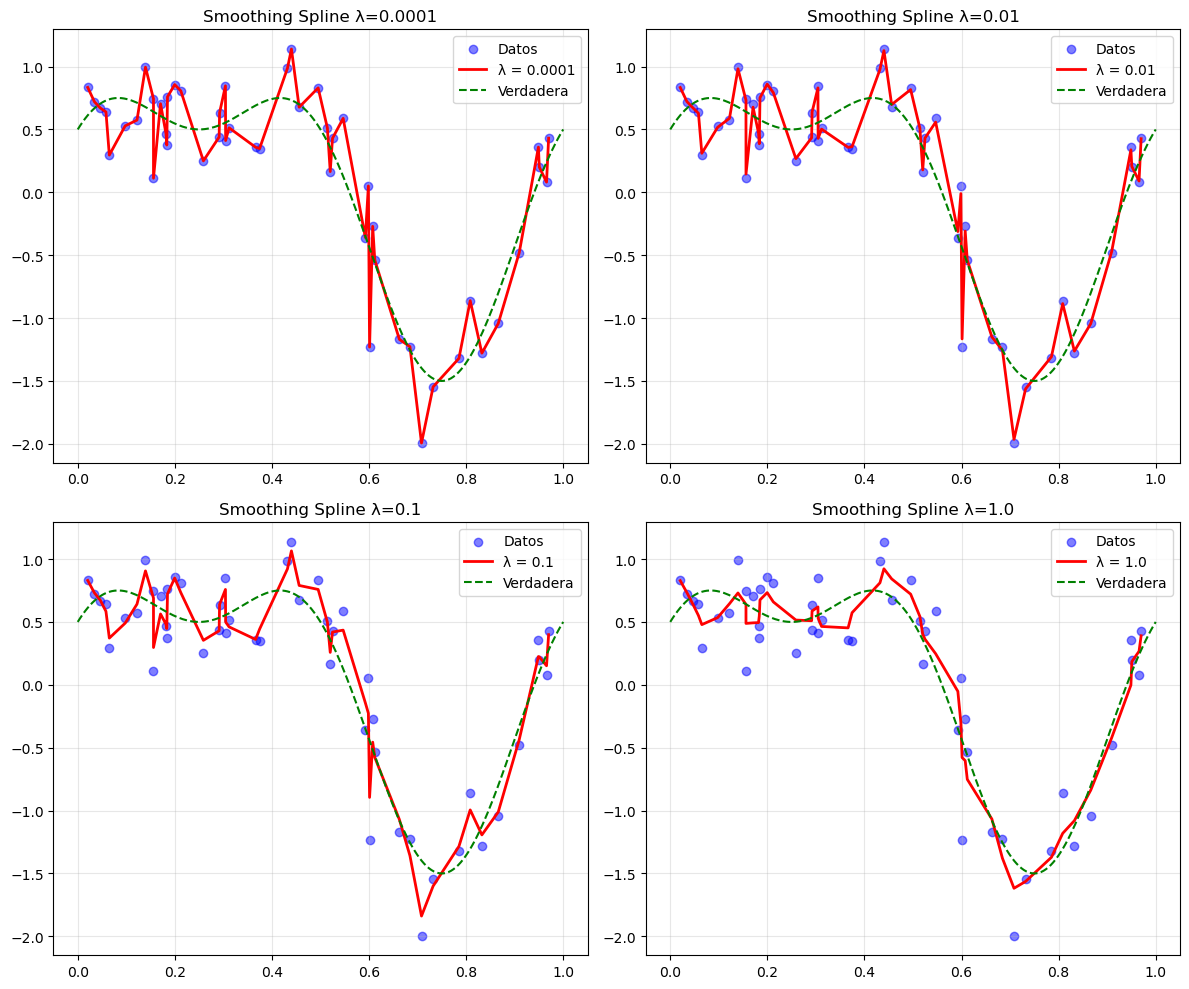

In [14]:
lambda_values = [0.0001, 0.01, 0.1, 1.0]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()

for i, lam in enumerate(lambda_values):
    y_fit, _ = smoothing_spline(x, y, lambda_smooth=lam)
    axs[i].scatter(x, y, color='blue', alpha=0.5, label='Datos')
    axs[i].plot(x, y_fit, 'r-', linewidth=2, label=f'λ = {lam}')
    axs[i].plot(x_test, y_true, 'g--', label='Verdadera')
    axs[i].set_title(f'Smoothing Spline λ={lam}')
    axs[i].legend()
    axs[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [15]:
# Generar 2 predictores independientes
N = 100
x1 = np.random.uniform(0, 1, N)
x2 = np.random.uniform(0, 1, N)

# Funciones verdaderas suaves
f1_true = np.sin(2 * np.pi * x1)
f2_true = 0.5 * np.cos(4 * np.pi * x2)

y = f1_true + f2_true + np.random.normal(0, 0.3, N)

# Puntos para plot 3D
x1_grid, x2_grid = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))
y_true_grid = np.sin(2 * np.pi * x1_grid) + 0.5 * np.cos(4 * np.pi * x2_grid)

def smoothing_spline_1d(x, y, lambda_smooth=0.1):
    n = len(x)
    sort_idx = np.argsort(x)
    x_sorted = x[sort_idx]
    y_sorted = y[sort_idx]
    D = np.diff(np.eye(n), n=2, axis=0)
    k = D.T @ D
    XtX_lambdaK = np.eye(n) + lambda_smooth * k
    beta = linalg.solve(XtX_lambdaK, y_sorted)
    return beta, sort_idx # beta son los valores ajustados en x_sorted


# Ajuste separado para cada predictor
f1_fit, idx1 = smoothing_spline_1d(x1, y, lambda_smooth=0.01)
f2_fit, idx2 = smoothing_spline_1d(x2, y, lambda_smooth=0.01)

# Prediccion aditiva
y_gam = f1_fit[np.searchsorted(x1[idx1], x1)] + f2_fit[np.searchsorted(x2[idx2], x2)]

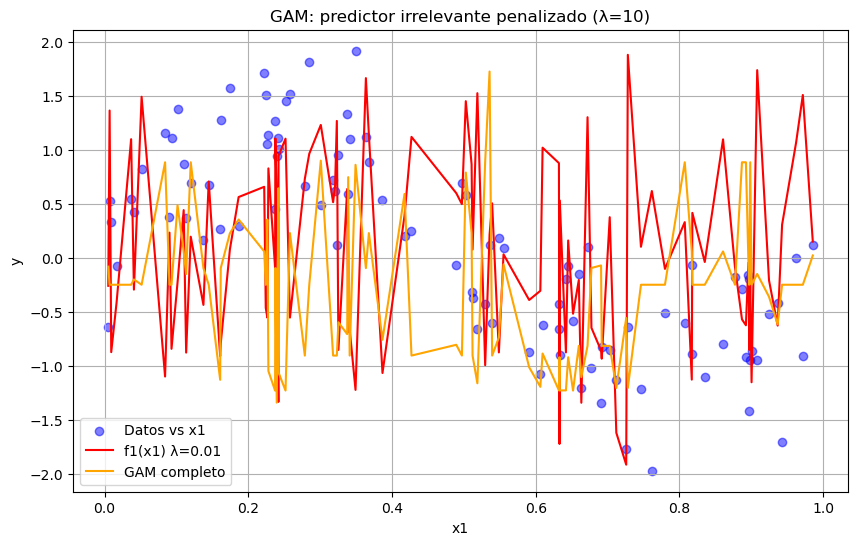

In [16]:
# (copia generación de x1, x2, y con f2 = 0 + ruido)
lambda_list = [0.01, 10.0]  # bajo para x1, alto para x2

f1_fit, _ = smoothing_spline_1d(x1, y, lambda_list[0])
f2_fit, _ = smoothing_spline_1d(x2, y, lambda_list[1])

y_gam = f1_fit[np.searchsorted(x1, x1, side='right')-1] + f2_fit[np.searchsorted(x2, x2, side='right')-1]

plt.figure(figsize=(10, 6))
plt.scatter(x1, y, color='blue', alpha=0.5, label='Datos vs x1')
plt.plot(x1[np.argsort(x1)], f1_fit[np.argsort(x1)], 'r-', label='f1(x1) λ=0.01')
plt.plot(x1[np.argsort(x1)], y_gam[np.argsort(x1)], 'orange', label='GAM completo')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('GAM: predictor irrelevante penalizado (λ=10)')
plt.legend()
plt.grid(True)
plt.show()

## Conclusiones del ejercicio (Capítulo 4)

- *Smoothing splines*:  
  - λ pequeño → spline ondulado → ajusta ruido → overfitting.  
  - λ mayor → spline suave → captura tendencia general → reduce varianza.

- *GAMs*:  
  - Modelos aditivos permiten funciones no lineales por predictor.  
  - Penalización alta en un predictor (ej. λ=10 en f₂) → efecto parcial casi plano → selección automática (ignora variables irrelevantes).

- *Ventajas observadas*:  
  - Flexibilidad no lineal sin perder interpretabilidad.  
  - Control de complejidad vía λ → balance bias-variance.

Este ejercicio refuerza la idea central del Capítulo 4: basis expansions + regularización para modelos flexibles y controlados.